# Assignment 1 - Matrix-matrix multiplication

In [19]:
import numpy as np
import timeit as timeit
from numpy.testing import assert_almost_equal
import matplotlib.pylab as plt
import numba 

### Part 1: a better function

In [21]:
# Slow matrix multiplication function 

def slow_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for c in range(mat2.shape[1]):
        column = []
        for r in range(mat1.shape[0]):
            value = 0
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            column.append(value)
        result.append(column)
    return np.array(result).transpose()

In [22]:
# Faster matrix multiplication function

def fast_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = []
    for r in range(mat1.shape[0]):
        column = []
        for c in range(mat2.shape[1]):
            value = np.sum(mat1[r,:]*mat2[:, c])
            column.append(value)
        result.append(column)
    return np.array(result)

In [23]:
# Assertion Checker

def test_matrix_function(func):

    test_dimensions = [2,3,4,5]

    for n in test_dimensions:
        matrix1 = np.random.rand(n,n)
        matrix2 = np.random.rand(n,n)
        
        assert_almost_equal(func(matrix1,matrix2), matrix1@matrix2)

        return "Your matrix multiplier works as intended"

test_matrix_function(fast_matrix_product)

'Your matrix multiplier works as intended'

Reasons why my function is better than slow_matrix_product:

1. Python is an interpreted language, and looks at code line by line. It therefore executes each line for each iteration, meaning for loops are quite slow; having nested for loops makes this process even slower. Thus, truncating the 3 for loops in slow_matrix_product into 2 makes the process faster. 

2. Removed transpose() by swapping the for loops of mat1 and mat2, so that less unnecessary calculations are done. 

38.7 μs ± 51.7 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
82.1 μs ± 120 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
[Slow] N=5 Average Run time: 3.867387285988246e-05
[Fast] N=5 Average Run Time: 8.209301571893905e-05
272 μs ± 849 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
329 μs ± 4.17 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[Slow] N=10 Average Run time: 0.00027164214284026197
[Fast] N=10 Average Run Time: 0.00032889530002804733
2.05 ms ± 12.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.27 ms ± 22.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
[Slow] N=20 Average Run time: 0.0020504004288730876
[Fast] N=20 Average Run Time: 0.0012677341857592443
30.7 ms ± 236 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.99 ms ± 95.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
[Slow] N=50 Average Run time: 0.030676552856207958
[Fast] N=50 Average Run Time: 0.007994026714337191
104 

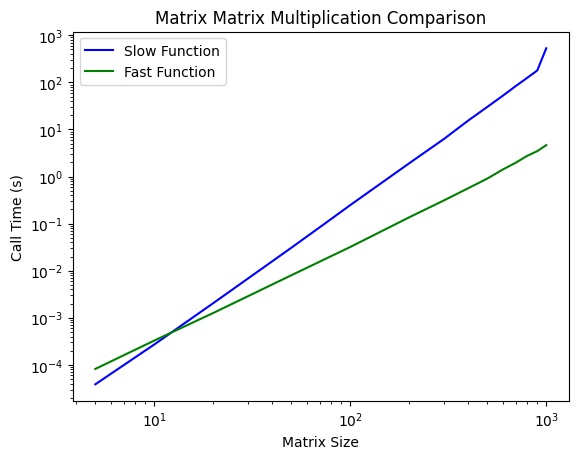

In [7]:
def fast_comparison_plots(slow_func,fast_func):

    # Ensuring function works correctly
    test_matrix_function(fast_func)

    # Setting up execution timer

    slow_times = []
    fast_times = []

    matrix_size = [5,10,20,50,75]+list(range(100,1001,100))

    for n in matrix_size:
        matrix1 = np.random.rand(n,n)
        matrix2 = np.random.rand(n,n)

        t_slow = %timeit -o (slow_func(matrix1,matrix2))
        t_fast = %timeit -o (fast_func(matrix1,matrix2))

        slow_times.append(t_slow.average)
        fast_times.append(t_fast.average)

        print(f"[Slow] N={n} Average Run time: {t_slow.average}")
        print(f"[Fast] N={n} Average Run Time: {t_fast.average}")

    # Setting up plots  

    plt.plot(matrix_size, slow_times, "b", label="Slow Function")
    plt.plot(matrix_size, fast_times, "g", label="Fast Function")

    plt.xlabel("Matrix Size")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("Call Time (s)")
    plt.title("Matrix Matrix Multiplication Comparison")
    plt.legend()
    
fast_comparison_plots(slow_matrix_product,fast_matrix_product)

### Part 2

In [34]:
#  Numba matrix multiplication Function 

@numba.njit(fastmath=True)
def numba_matrix_product(mat1, mat2):
    """Multiply two matrices."""
    assert mat1.shape[1] == mat2.shape[0]
    result = np.empty((mat1.shape[0],mat2.shape[1]), dtype=mat1.dtype)
    dt = mat1.dtype

    for r in range(mat1.shape[0]):
        for c in range(mat2.shape[1]):
            value = dt.type(0)
            for i in range(mat1.shape[1]):
                value += mat1[r, i] * mat2[i, c]
            result[r,c] = value  
    return result

matrix1 = np.random.rand(10, 10)
matrix2 = np.random.rand(10, 10)

test_matrix_function(numba_matrix_product)

'Your matrix multiplier works as intended'

82.1 μs ± 856 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
942 ns ± 7.88 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.21 μs ± 10.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
[Fast] N=5 Average Run Time: 8.214125428348779e-05
[Numba] N=5 Average Run Time: 9.424478714354336e-07
[Numpy] N=5 Average Run time: 1.2138842428435704e-06
318 μs ± 3.03 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
1.2 μs ± 9.67 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.44 μs ± 21.4 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
[Fast] N=10 Average Run Time: 0.0003178699285989361
[Numba] N=10 Average Run Time: 1.2011764857452365e-06
[Numpy] N=10 Average Run time: 1.4422060714901558e-06
1.3 ms ± 19.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
3.69 μs ± 59.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.21 μs ± 52.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
[F

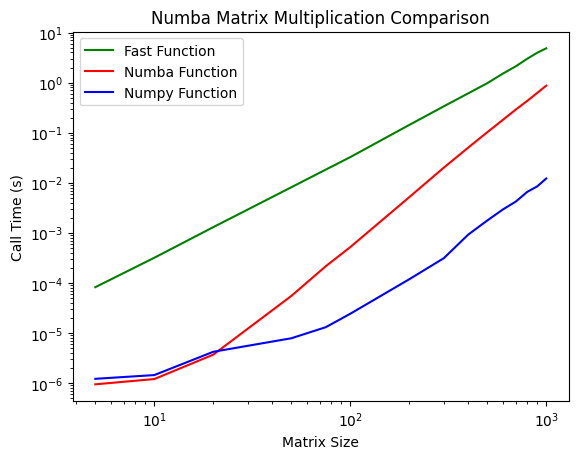

In [36]:
def numba_comparison_plots(fast_func,numba_func):

    # Copy and pasting time_and_plot function, and changing to account for numba.

    # Ensuring function works correctly
    test_matrix_function(fast_func)
    test_matrix_function(numba_func)

    # Setting up execution timers

    fast_times = []
    numba_times= []
    np_times = []

    matrix_size = [5,10,20,50,75]+list(range(100,1001,100))

    for n in matrix_size:
        matrix1 = np.random.rand(n,n)
        matrix2 = np.random.rand(n,n)

        t_fast = %timeit -o (fast_func(matrix1,matrix2))
        t_numba= %timeit -o (numba_func(matrix1,matrix2))
        t_np = %timeit -o (matrix1@matrix2)

        fast_times.append(t_fast.average)
        numba_times.append(t_numba.average)
        np_times.append(t_np.average)

        print(f"[Fast] N={n} Average Run Time: {t_fast.average}")
        print(f"[Numba] N={n} Average Run Time: {t_numba.average}")
        print(f"[Numpy] N={n} Average Run time: {t_np.average}")

    # Setting up plots  

    plt.plot(matrix_size, fast_times, "g", label="Fast Function")
    plt.plot(matrix_size, numba_times, "r", label="Numba Function")
    plt.plot(matrix_size, np_times, "b", label="Numpy Function")

    plt.xlabel("Matrix Size")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("Call Time (s)")
    plt.title("Numba Matrix Multiplication Comparison")
    plt.legend()
    
numba_comparison_plots(fast_matrix_product,numba_matrix_product)

1.31 μs ± 29.9 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.33 μs ± 13.3 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.3 μs ± 16.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.54 μs ± 12.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
[Both Fortran] N=5 Average Run time: 1.3107623428971108e-06
[Both C] N=5 Average Run Time: 1.3272859285519059e-06
[C and Fortran] N=5 Average Run Time: 1.3002785714010573e-06
[Fortran and C] N=5 Average Run Time: 1.5424398000551654e-06
1.34 μs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.31 μs ± 18 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.29 μs ± 21.7 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
1.53 μs ± 16.6 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
[Both Fortran] N=10 Average Run time: 1.3395134142733045e-06
[Both C] N=10 Average Run Time: 1.3051141428295524e-06
[C and Fortran] N=10 Averag

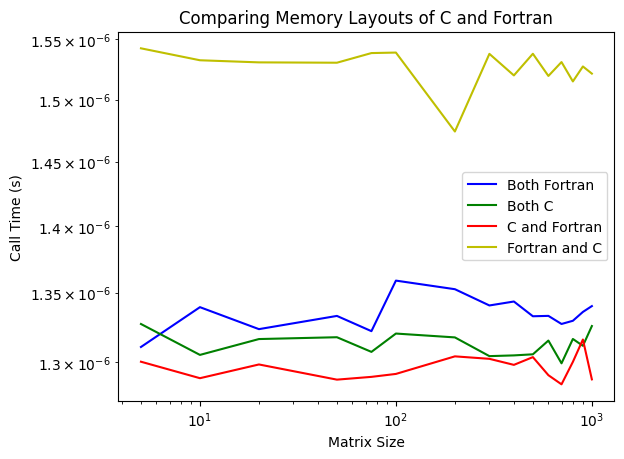

In [38]:
def diff_memory_plots(numba_func):

    # Copy and pasting time_and_plot function, and changing to account for nmemory layouts of matrices for C and Fortran.

    # Ensuring function works correctly
    test_matrix_function(numba_func)

    # Setting up execution timers

    f_and_f_times= []
    c_and_c_times= []
    c_and_f_times= []
    f_and_c_times= []

    matrix_size = [5,10,20,50,75]+list(range(100,1001,100))

    for n in matrix_size:
        fortran_matrix = np.asfortranarray(np.random.rand(10, 10))
        c_matrix = np.ascontiguousarray(np.random.rand(10, 10))

        
        t_f_and_f= %timeit -o (numba_func(fortran_matrix,fortran_matrix))
        t_c_and_c= %timeit -o (numba_func(c_matrix,c_matrix))
        t_c_and_f= %timeit -o (numba_func(c_matrix,fortran_matrix))
        t_f_and_c= %timeit -o (numba_func(fortran_matrix,c_matrix))

        f_and_f_times.append(t_f_and_f.average)
        c_and_c_times.append(t_c_and_c.average)
        c_and_f_times.append(t_c_and_f.average)
        f_and_c_times.append(t_f_and_c.average)

        print(f"[Both Fortran] N={n} Average Run time: {t_f_and_f.average}")
        print(f"[Both C] N={n} Average Run Time: {t_c_and_c.average}")
        print(f"[C and Fortran] N={n} Average Run Time: {t_c_and_f.average}")
        print(f"[Fortran and C] N={n} Average Run Time: {t_f_and_c.average}")

    # Setting up plots  

    plt.plot(matrix_size, f_and_f_times, "b", label="Both Fortran")
    plt.plot(matrix_size, c_and_c_times, "g", label="Both C")
    plt.plot(matrix_size, c_and_f_times, "r", label="C and Fortran")
    plt.plot(matrix_size, f_and_c_times, "y", label="Fortran and C")

    plt.xlabel("Matrix Size")
    plt.xscale("log")
    plt.yscale("log")
    plt.ylabel("Call Time (s)")
    plt.title("Comparing Memory Layouts of C and Fortran")
    plt.legend()


diff_memory_plots(numba_matrix_product)